In [1]:
from modules.client import OffVarianceClient
import modules.utils as utils
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

In [2]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win1'] >= 1.8) & (games_df['odds_open_win1'] <= 2.8) &
(games_df['odds_open_tm25'] >= 2.0) & (games_df['odds_open_tm25'] <= 2.5)
]

Count: 5402
Open profit: -152.27000000000004
Close profit: -145.79000000000002
Open ROI: -0.028187708256201413
Close ROI: -0.026988152536097744
UDI: -0.0014138471381909504
AxesSubplot(0.125,0.125;0.775x0.755)


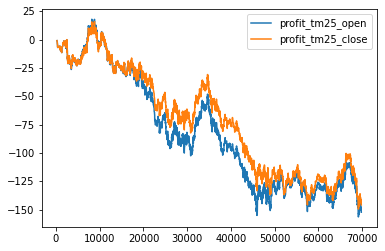

In [67]:
utils.print_total_under_result(segmented_df)

In [68]:
utils.analyze_correlation(segmented_df, 'total', utils.metrics)

,correlation
expected_total,0.082321
expected_total_loc,0.074662
simple_expected_total_value_loc,0.067443
simple_expected_total_value,0.064472
expected_difference,0.022342
expected_difference_loc,0.020583
simple_expected_difference_loc,0.019880
simple_expected_difference,-0.000030


In [69]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_tm25')

,low,high,diff
expected_total_loc,2.823688,2.437726,0.385962
expected_total,2.772410,2.396656,0.375754
simple_expected_total_value,5.457077,5.119577,0.337499
simple_expected_total_value_loc,5.460624,5.174038,0.286586
expected_difference,0.268217,0.209932,0.058285
expected_difference_loc,0.291201,0.235258,0.055943
simple_expected_difference_loc,0.269977,0.235540,0.034437
simple_expected_difference,0.006001,0.020031,0.014030


In [70]:
updated_segmented_df = segmented_df.loc[
(segmented_df['expected_total_loc'] <= 2.43) & (segmented_df['expected_total'] <= 2.39)
]

utils.analyze_avg_udi(updated_segmented_df, [
    'expected_total',
    'expected_total_loc',
], 'udi_tm25')

,low,high,diff
expected_total,2.145805,2.036313,0.109492
expected_total_loc,1.976715,1.910928,0.065787


Count: 75
Open profit: 11.189999999999998
Close profit: 8.36
Open ROI: 0.14919999999999997
Close ROI: 0.11146666666666666
UDI: 0.04135502161578588
AxesSubplot(0.125,0.125;0.775x0.755)


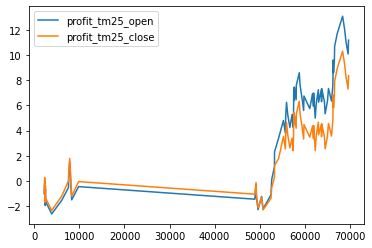

In [3]:
filtered_result_df = segmented_df.loc[
(segmented_df['expected_total'] <= 2.03) & (segmented_df['expected_total_loc'] <= 1.91)
]
utils.print_total_under_result(filtered_result_df)